### IMPORTING LIBRARIES AND LOADING THE DATASET

In [61]:
import pandas as pd

In [62]:
import matplotlib.pyplot as plt

In [63]:
import seaborn as sns

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
df = pd.read_csv('Iris.csv')

### EXPLORATORY DATA ANALYSIS

In [41]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [43]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [44]:
df.duplicated().sum()

0

In [45]:
# the dataset does not contains null or duplicated values => it s a clean data that i can deal with it now !


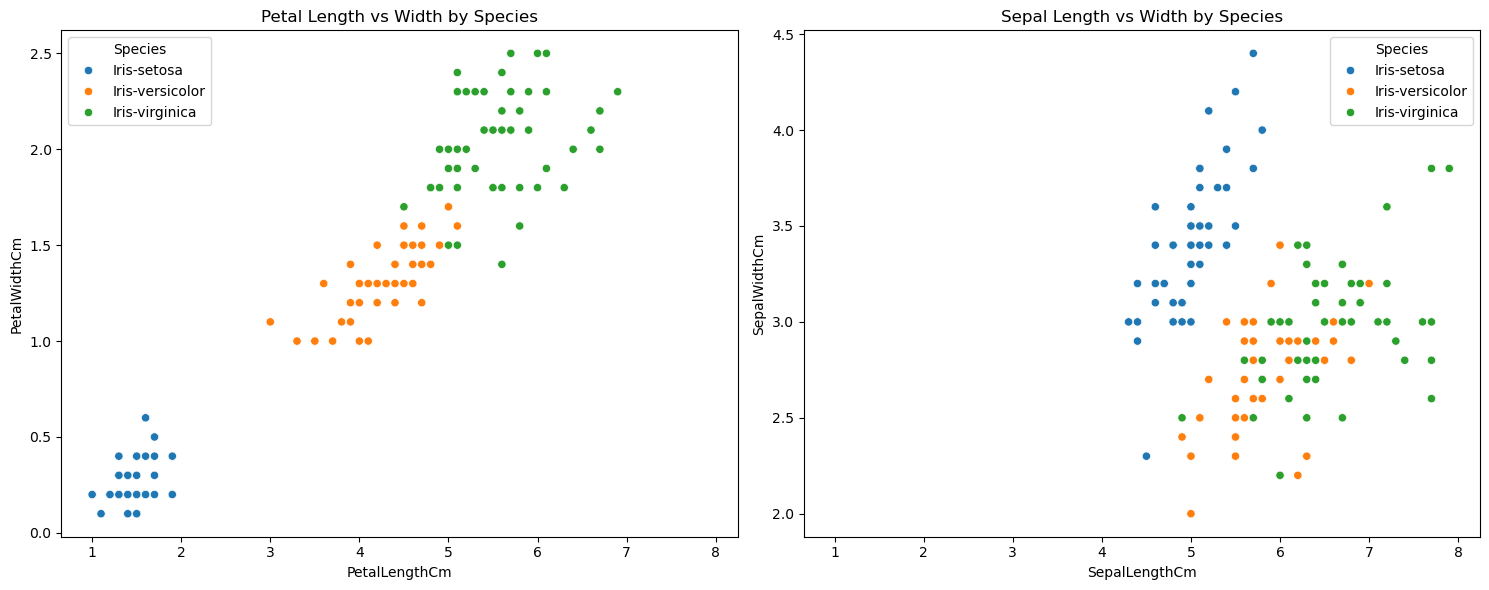

In [46]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', ax=ax1)
ax1.set_title('Petal Length vs Width by Species')

sns.scatterplot(data=df , x='SepalLengthCm', y='SepalWidthCm', hue='Species', ax=ax2)
ax2.set_title('Sepal Length vs Width by Species')

plt.tight_layout()
plt.show()

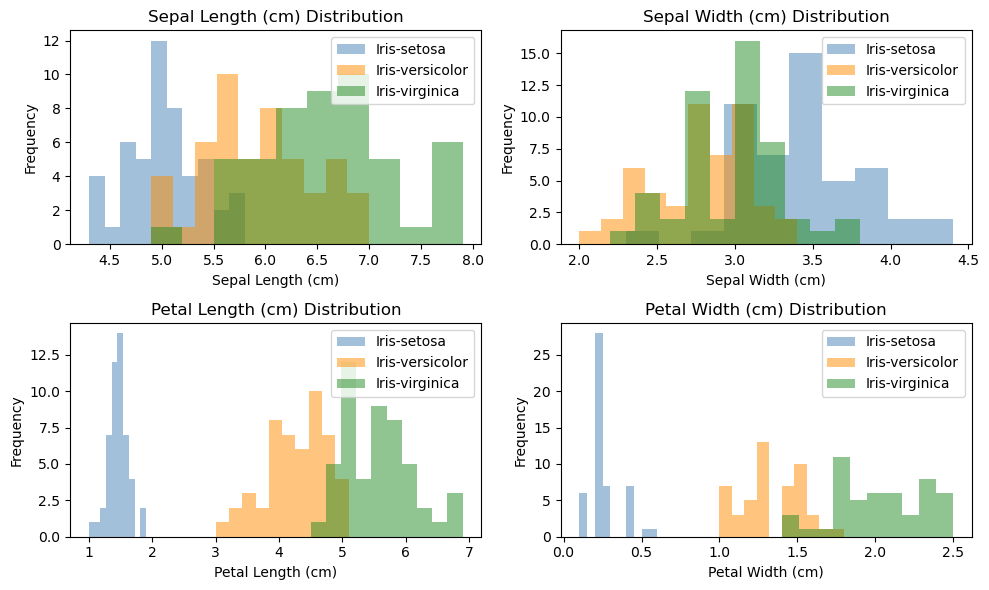

In [47]:

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
custom_labels = {
    'SepalLengthCm': 'Sepal Length (cm)',
    'SepalWidthCm': 'Sepal Width (cm)',
    'PetalLengthCm': 'Petal Length (cm)',
    'PetalWidthCm': 'Petal Width (cm)'
}

species = df['Species'].unique()
colors = ['steelblue', 'darkorange', 'forestgreen']

plt.figure(figsize=(10, 6))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    for j, sp in enumerate(species):
        subset = df[df['Species'] == sp]
        plt.hist(subset[feature], bins=10, alpha=0.5, color=colors[j], label=sp)
    plt.title(f'{custom_labels[feature]} Distribution')
    plt.xlabel(custom_labels[feature])
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

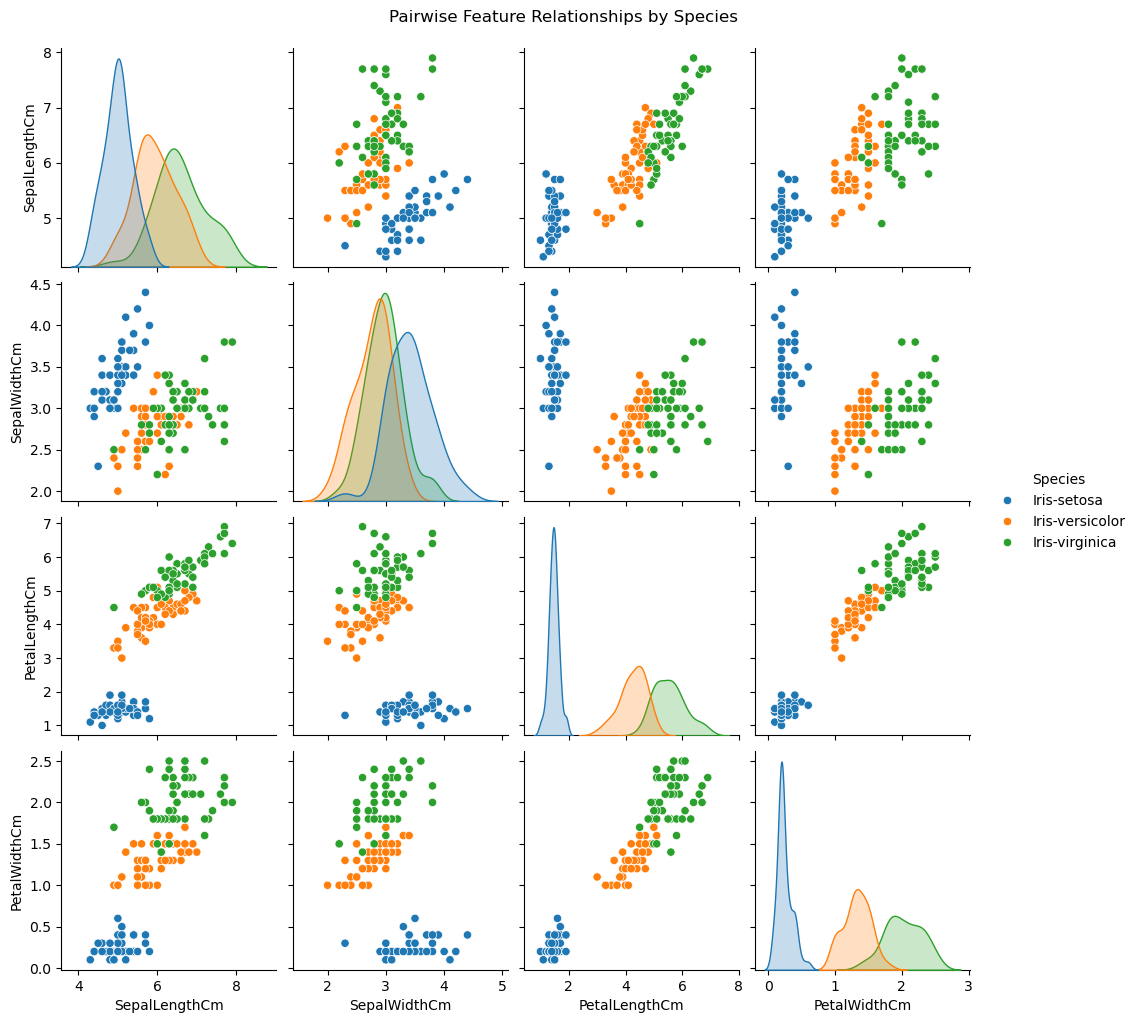

In [48]:
df_no_id = df.drop(columns=['Id'])

# Pairplot with Species as hue
sns.pairplot(df_no_id, hue='Species')
plt.suptitle("Pairwise Feature Relationships by Species", y=1.02)
plt.show()



<Axes: ylabel='Density'>

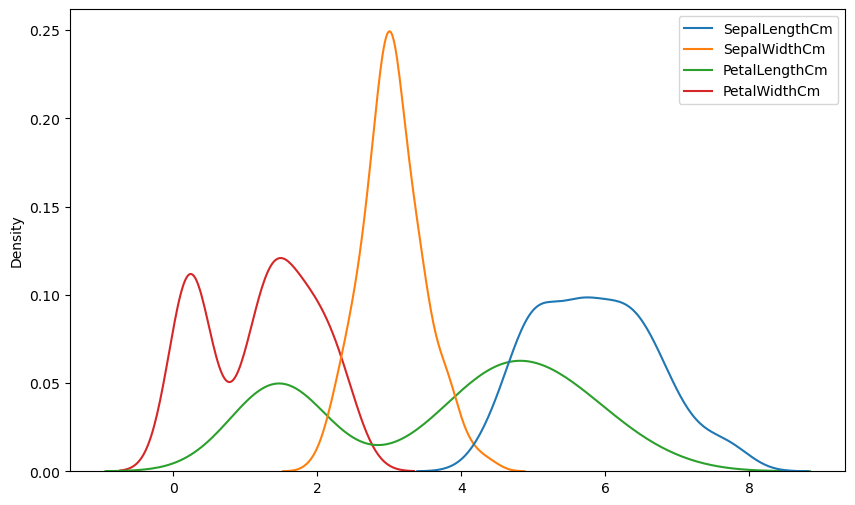

In [49]:
plt.figure(figsize=(10, 6))
df_no_id = df.drop(columns=['Id'])
sns.kdeplot(data=df_no_id)

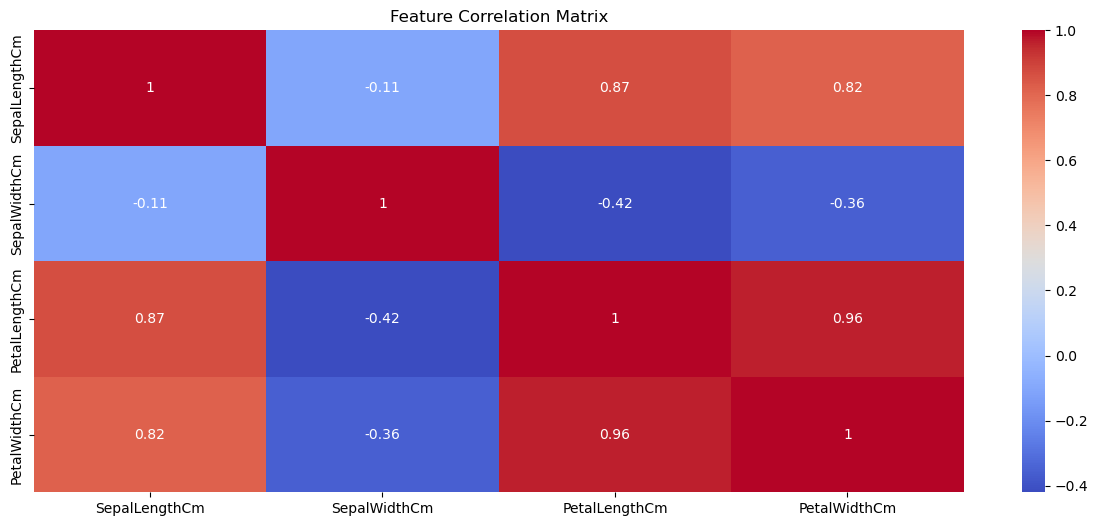

In [50]:
plt.figure(figsize=(15, 6))
corr = df_no_id.drop(columns=['Species']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

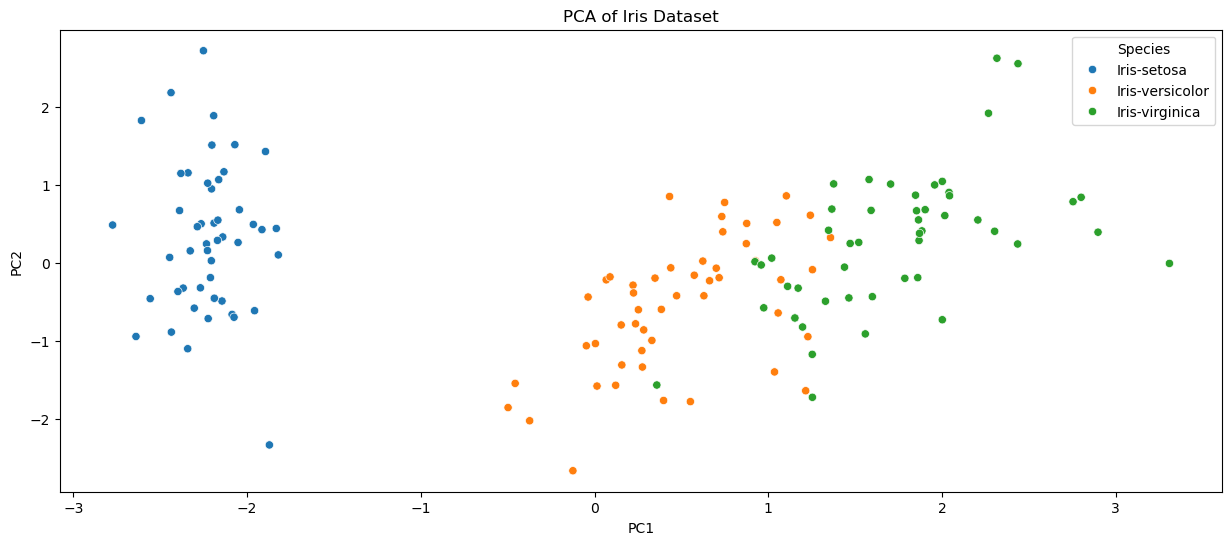

In [54]:

features = df_no_id.drop('Species', axis=1)
X_scaled = StandardScaler().fit(features).transform(features)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2']).assign(Species=df_no_id['Species'])

plt.figure(figsize=(15, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species')
plt.title('PCA of Iris Dataset')
plt.show()
